In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.interpolate import interp1d	

from logistics_2 import paralelizar, run_simulation



plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.rm'] = 'serif'
plt.rcParams['font.size'] = 14  

Vayamos por partes, como dijo jack el destripador
1. Establecemos IGUALDAD entre el Markovian limit y el few-mode (Jaynes-cummings)
2. Establecemos DESIGUALDAD netre el Non-Markovian limit y el many-mode
3. Opcional: se puede explicar el corrimiento de los modos con un infinite-coupling limit? 


# 1. spectrum vs $\gamma \tau$ 

In [3]:
from matplotlib.colors import PowerNorm

def exp000(phi_values,gamma_s,tau_s):
	initial = [1,0]
	t_max = 200 * tau_s
	dt = tau_s/100 
	Ms = np.arange(10000,10400,1)

	def sample_phi(phi_value):
		_,_,_,_,w,u = run_simulation(gamma_s,tau_s,phi_value,0,t_max,dt,initial,Ms)   # not the same using S or U, need to look into it
		return w,u
	
	data = paralelizar(phi_values,sample_phi)
	data_w = np.asarray([data_f[0] for data_f in data])
	data_u = np.abs(np.asarray([np.abs(np.real(data_f[1])) for data_f in data]))

	w_min = -6*np.pi/tau_s
	w_max = 6*np.pi/tau_s
	u_trim_1 = []
	for n in range(len(phi_values)):
		w_ref = np.linspace(w_min,w_max,1000)+phi_values[n]/tau_s
		interp =interp1d(data_w[n,:],data_u[n,:])
		u_trim_1.append(interp(w_ref))

	map_u = np.asarray(u_trim_1)
	plt.figure(figsize=(8, 4))
	plt.imshow(map_u,
				cmap='inferno',
				origin='lower',
				extent= [w_min*tau_s/np.pi,w_max*tau_s/np.pi,phi_values[0]/np.pi,phi_values[-1]/np.pi],
				norm=PowerNorm(gamma=0.45),
				aspect='auto')
	plt.colorbar(label=r"Log$[S(\nu)]$")
	plt.title(rf'Spectrum with $ \gamma \tau = {gamma_s*tau_s:.2f}  $')
	plt.xlabel(r"$\nu \tau / \pi  $")
	plt.ylabel(r"$\phi / \pi $")
	plt.gca().invert_xaxis()
	plt.show()

	return data_w,data_u

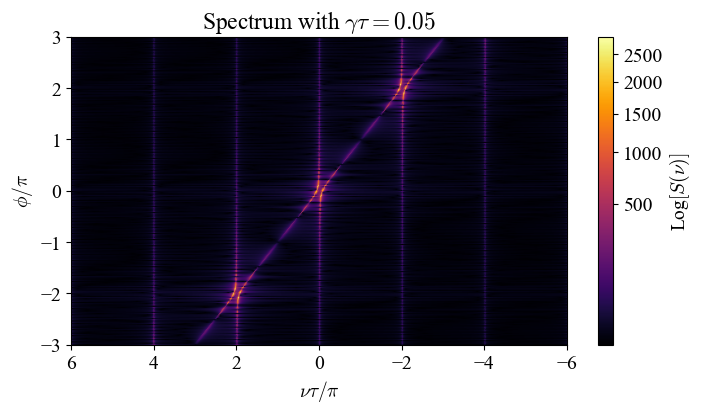

In [4]:
phi_values= np.linspace(-3*np.pi,3*np.pi,250)
gamma = 0.05
tau = 1

_,_ = exp000(phi_values,gamma,tau)

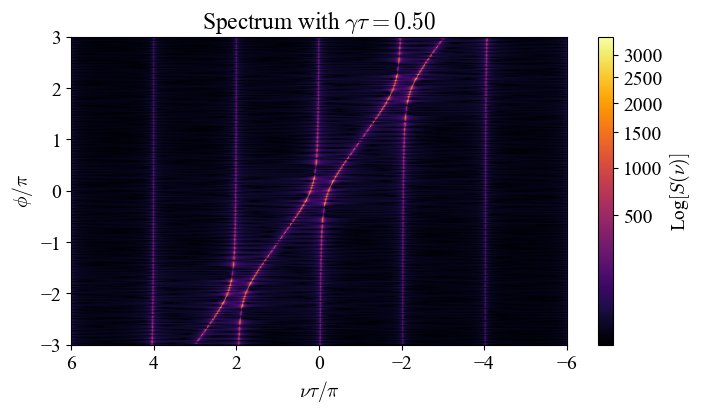

In [5]:
phi_values= np.linspace(-3*np.pi,3*np.pi,250)
gamma = 0.5
tau = 1

_,_ = exp000(phi_values,gamma,tau)

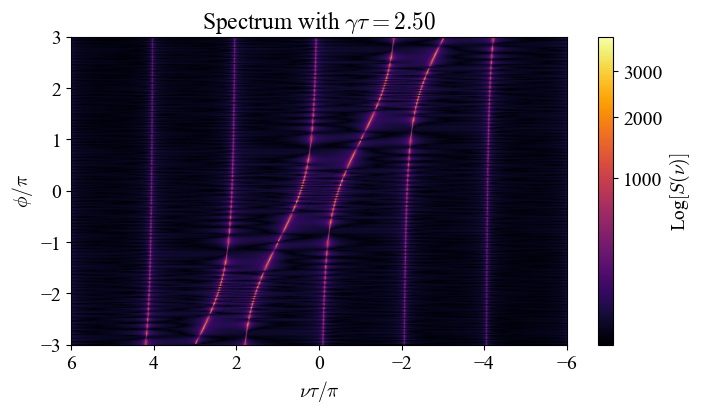

In [6]:
phi_values= np.linspace(-3*np.pi,3*np.pi,250)
gamma = 2.5
tau = 1

_,_ = exp000(phi_values,gamma,tau)

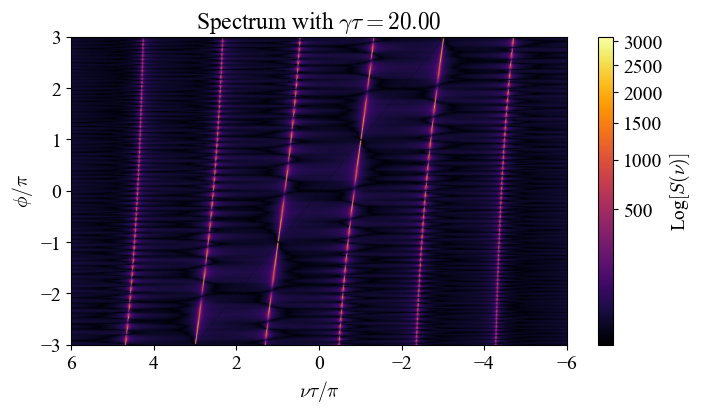

In [7]:
phi_values= np.linspace(-3*np.pi,3*np.pi,250)
gamma = 20
tau = 1

_,_ = exp000(phi_values,gamma,tau)

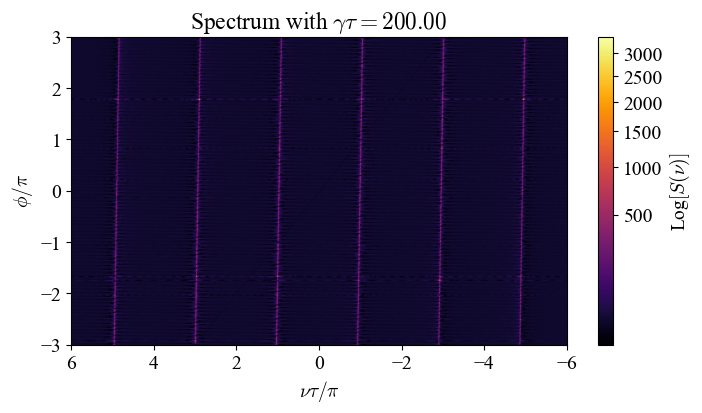

In [8]:
phi_values= np.linspace(-3*np.pi,3*np.pi,250)
gamma = 200
tau = 1

_,_ = exp000(phi_values,gamma,tau)

# 2. Similarities with Jaynes-cummings ($\gamma \tau \approx 0 $)

# 3. discrepancies with many-mode ($\gamma \tau \to \infty $)